# Telecom Customer Churn Prediction
In this model we predict behavior to retain customers by analyzing all the relevant customer data.
Customers who left within the last month are recorded in the column Churn. Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies and Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges and Demographic info about customers – gender, age range, and if they have partners and dependents have been analyzed.

### Importing the data

In [3]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.ticker as mtick 
import matplotlib.pyplot as plt
from pylab import *
import warnings

warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

df=pd.read_csv('Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Understanding the data

In [4]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
df.shape

(7043, 21)

In [9]:
df.columns


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [10]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [11]:
#categorical attributes
categories=[]
for x in df.dtypes.index:
    if df.dtypes[x]=='object':
        categories.append(x)
categories

['customerID',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges',
 'Churn']

In [12]:
for i in categories:
    print(i)
    print(df[i].value_counts())
    print()

customerID
7504-UWHNB    1
3520-FJGCV    1
5949-XIKAE    1
2371-JUNGC    1
0121-SNYRK    1
             ..
8755-OGKNA    1
4484-CGXFK    1
8728-SKJLR    1
5624-BQSSA    1
8347-GDTMP    1
Name: customerID, Length: 7043, dtype: int64

gender
Male      3555
Female    3488
Name: gender, dtype: int64

Partner
No     3641
Yes    3402
Name: Partner, dtype: int64

Dependents
No     4933
Yes    2110
Name: Dependents, dtype: int64

PhoneService
Yes    6361
No      682
Name: PhoneService, dtype: int64

MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64



In [7]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

### Data Manipulation

In [21]:
# Add features
df['total_charges_to_tenure_ratio'] = df['TotalCharges'] / df['tenure']
df['TotalCharges'] = df['TotalCharges'].replace(" ", 0).astype('float64')
df['monthly_charges_diff'] = df['MonthlyCharges'] - df['total_charges_to_tenure_ratio']
df['churn_rate'] = df['Churn'].replace("No", 0).replace("Yes", 1)

In [22]:
df.dtypes

customerID                        object
gender                            object
SeniorCitizen                      int64
Partner                           object
Dependents                        object
tenure                             int64
PhoneService                      object
MultipleLines                     object
InternetService                   object
OnlineSecurity                    object
OnlineBackup                      object
DeviceProtection                  object
TechSupport                       object
StreamingTV                       object
StreamingMovies                   object
Contract                          object
PaperlessBilling                  object
PaymentMethod                     object
MonthlyCharges                   float64
TotalCharges                     float64
Churn                             object
total_charges_to_tenure_ratio    float64
monthly_charges_diff             float64
churn_rate                         int64
dtype: object

In [43]:
df.gender.unique()

array(['Female', 'Male'], dtype=object)

### Data Visualization

In [23]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'total_charges_to_tenure_ratio',
       'monthly_charges_diff', 'churn_rate'], dtype=object)

Text(0.5, 1.0, 'Distribution of monthly_charges_diff')

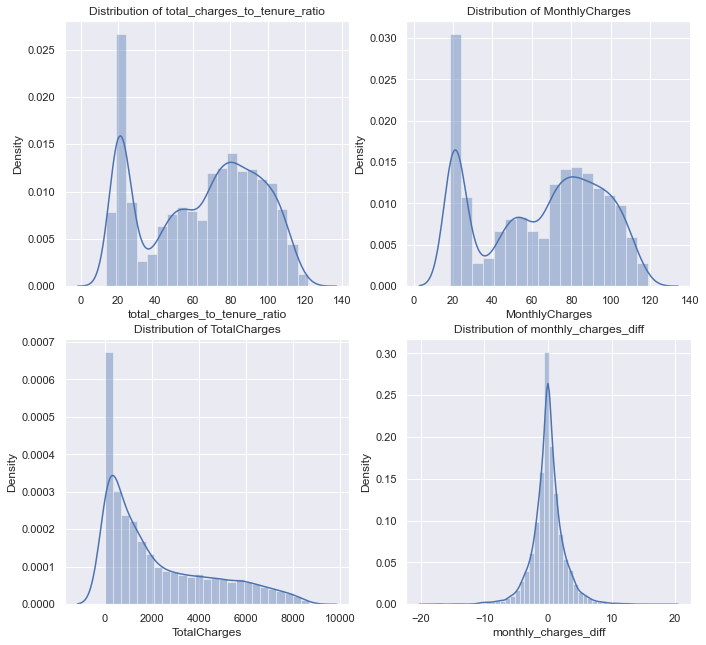

In [75]:
# Distribution of MonthlyCharges,TotalCharges,total_charges_to_tenure_ratio,monthly_charges_diff
sns.set(rc={"figure.figsize": (10,10)})
subplot(2,2,1)
sns.distplot(df['total_charges_to_tenure_ratio'])
plt.title("Distribution of total_charges_to_tenure_ratio")
subplot(2,2,2)
sns.distplot(df['MonthlyCharges'])
plt.title("Distribution of MonthlyCharges")
subplot(2,2,3)
sns.distplot(df['TotalCharges'])
plt.title("Distribution of TotalCharges")
subplot(2,2,4)
sns.distplot(df['monthly_charges_diff'])
plt.title("Distribution of monthly_charges_diff")

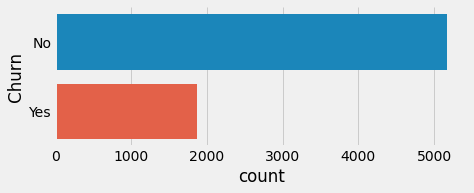

In [24]:
ax = sns.catplot(y="Churn", kind="count", data=df, height=2.6, aspect=2.5, orient='h')

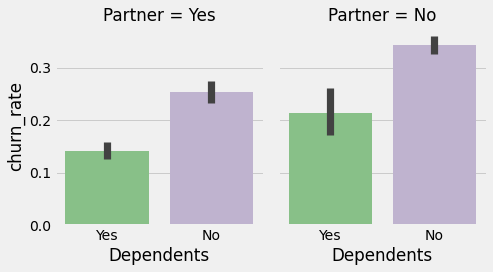

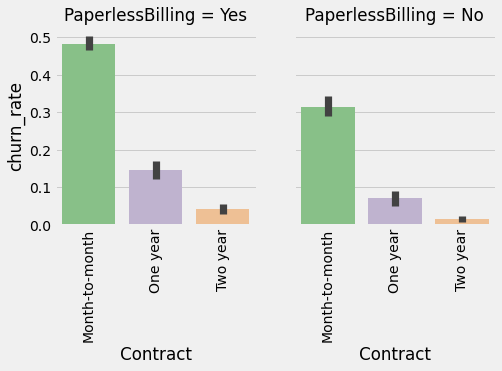

In [65]:
"""['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod']"""

g = sns.FacetGrid(df, col="Partner", height=4, aspect=.9)
ax = g.map(sns.barplot, "Dependents", "churn_rate", palette = "Accent", order= ['Yes', 'No'])
# Customers that doesn't have partners are more likely to churn
# Customers without dependents are also more likely to churn

labels= ['Month-to-month', 'One year', 'Two year']
g = sns.FacetGrid(df, col="PaperlessBilling", height=4, aspect=.9)
ax1 = g.map(sns.barplot, "Contract", "churn_rate", palette = "Accent", order= ['Month-to-month', 'One year', 'Two year'])
ax1.set_xticklabels(labels=labels, rotation=90)
# Customers with paperless billing are more probable to churn

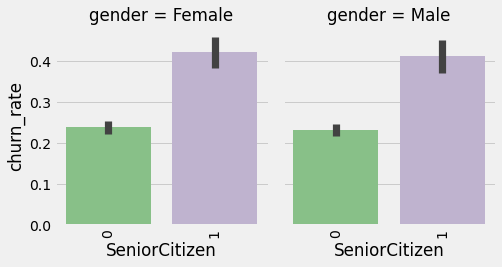

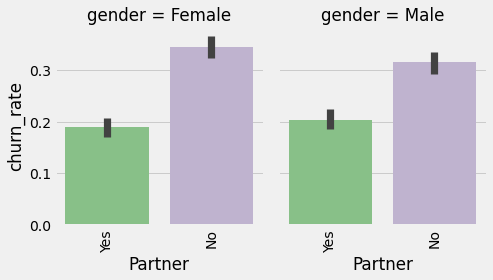

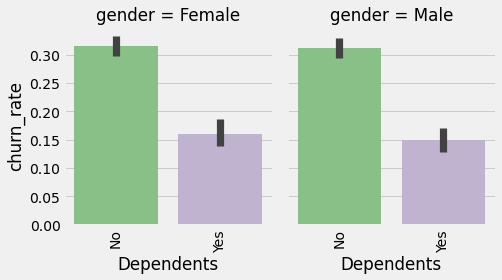

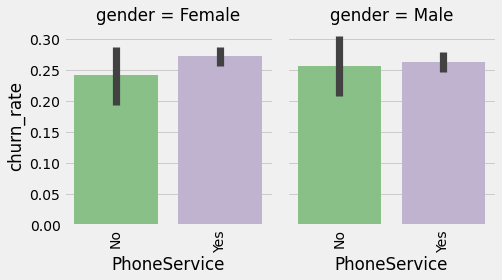

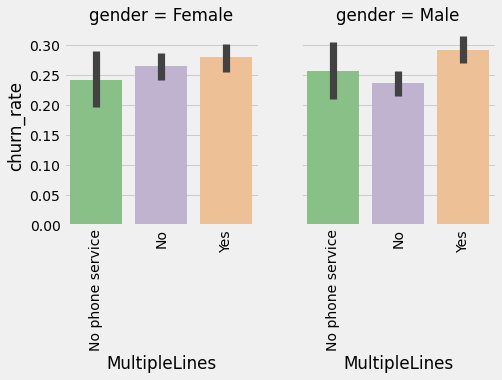

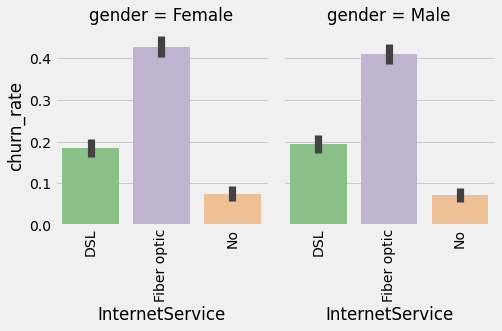

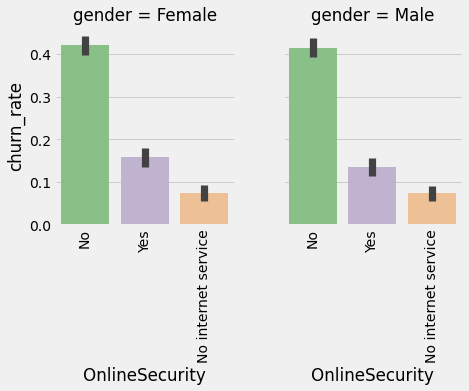

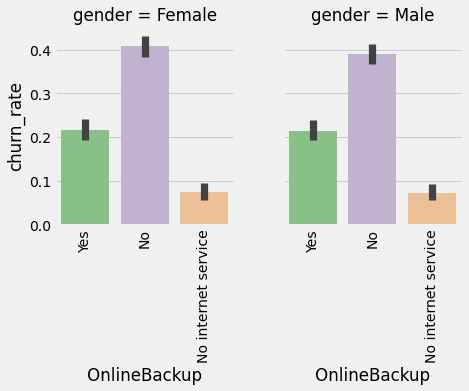

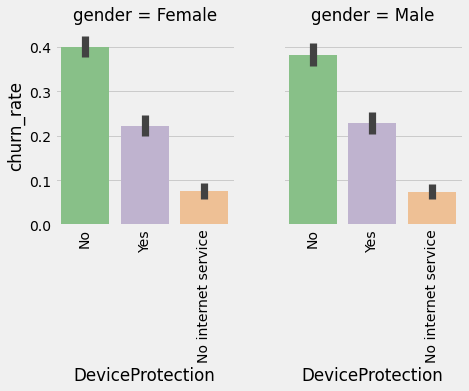

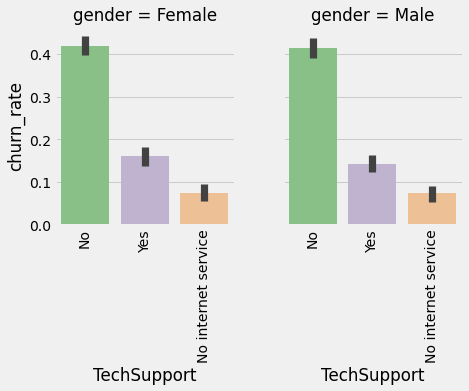

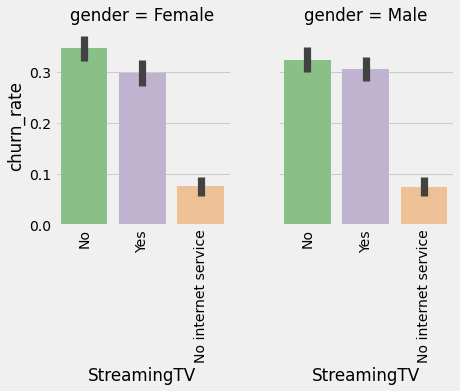

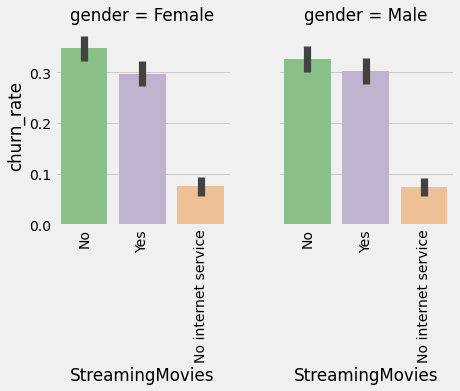

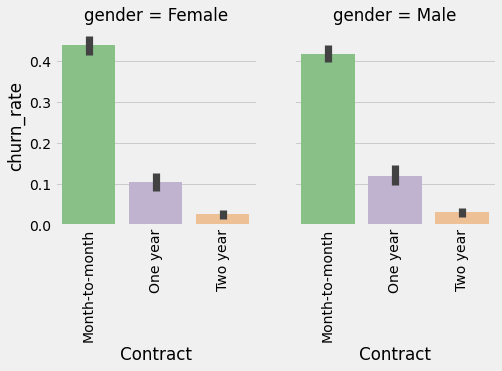

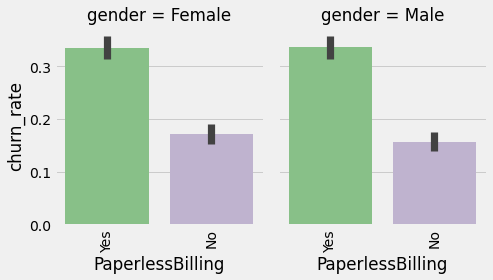

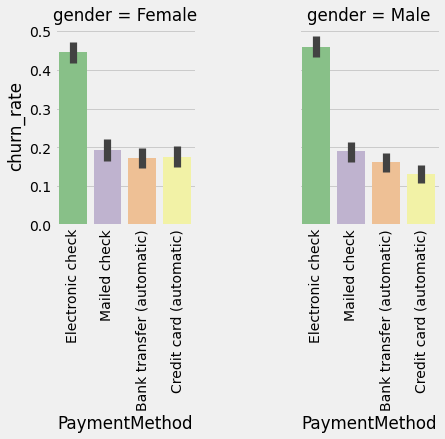

In [59]:
# Visualizing different factors effected wrt gender
categories1=['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod']
x=0
for i in categories1:
    labels= list(df[f"{i}"].unique())
    g = sns.FacetGrid(df, col="gender", height=4, aspect=.9)
    y=f"ax_{x}" 
    y= g.map(sns.barplot, f"{i}", "churn_rate", palette = "Accent", order= df[f"{i}"].unique())
    y.set_xticklabels(labels=labels, rotation=90)
    x=x+1

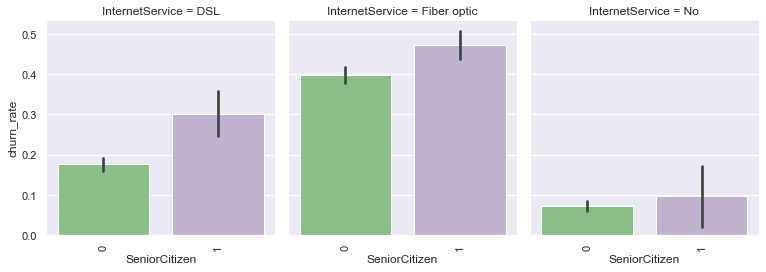

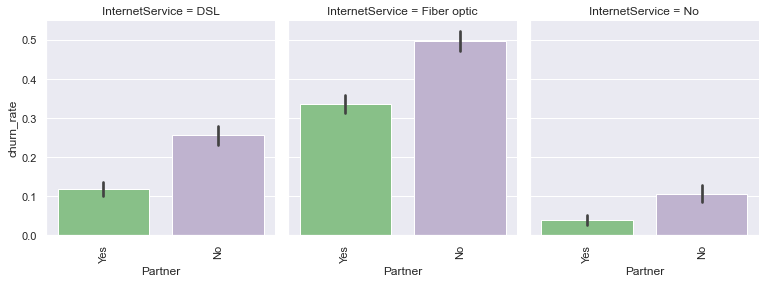

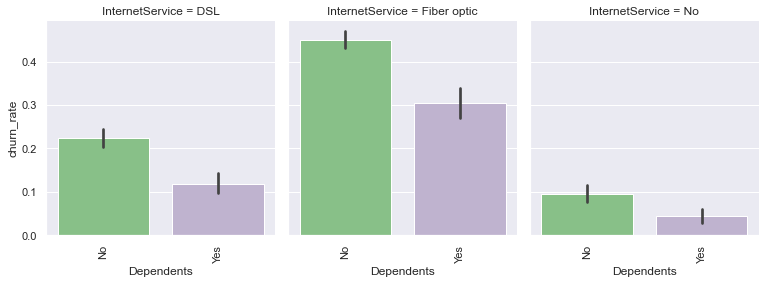

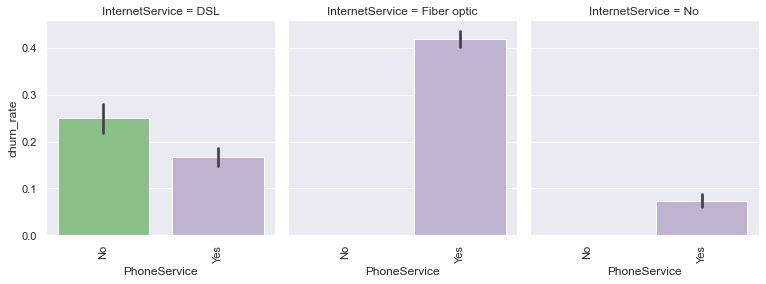

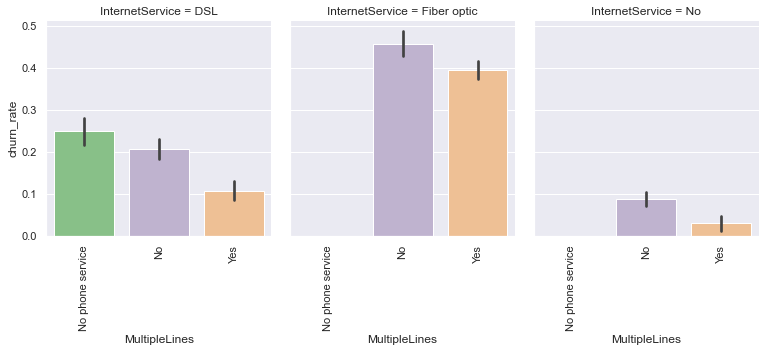

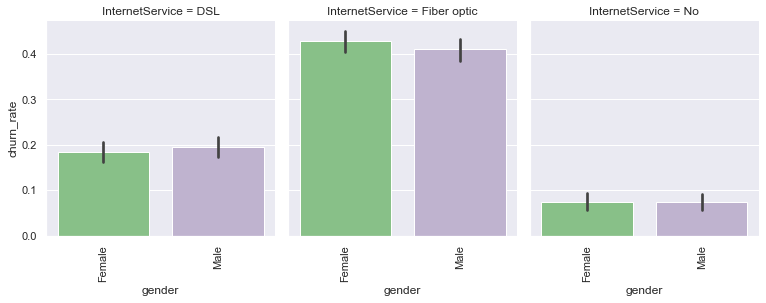

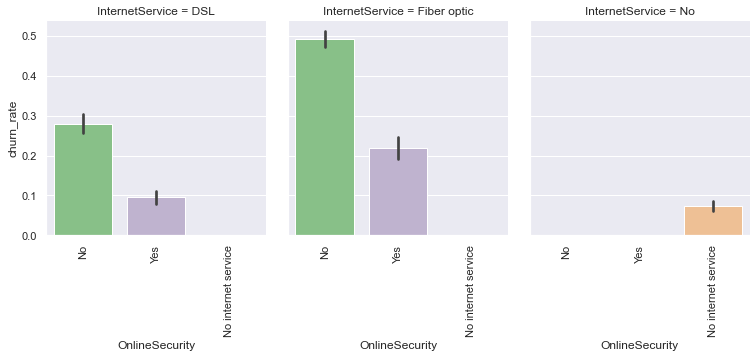

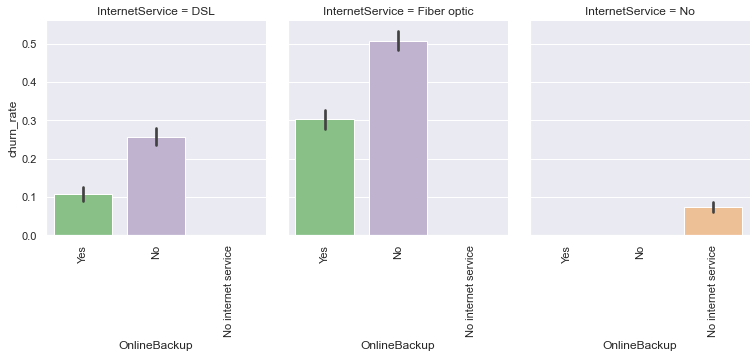

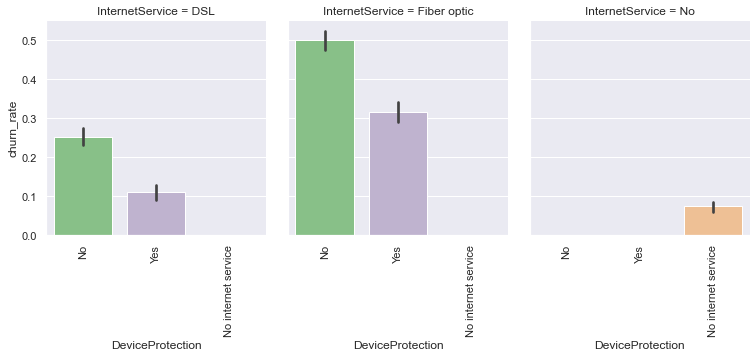

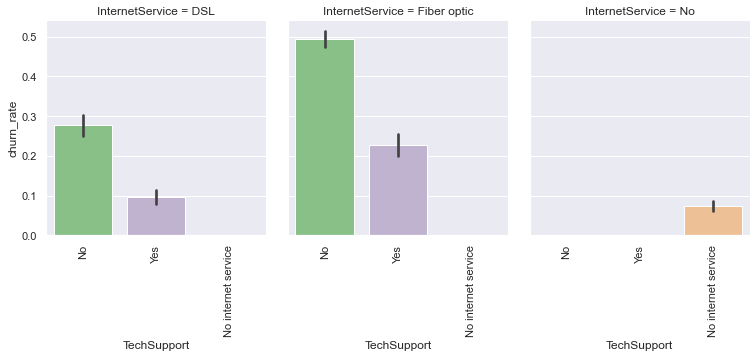

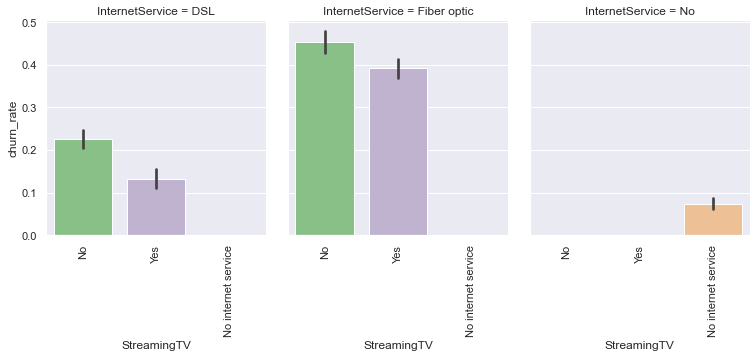

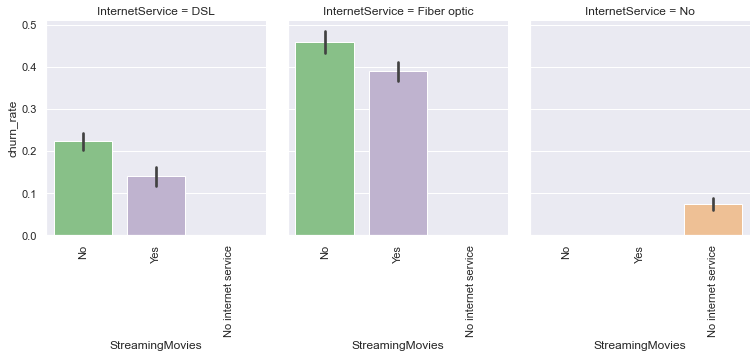

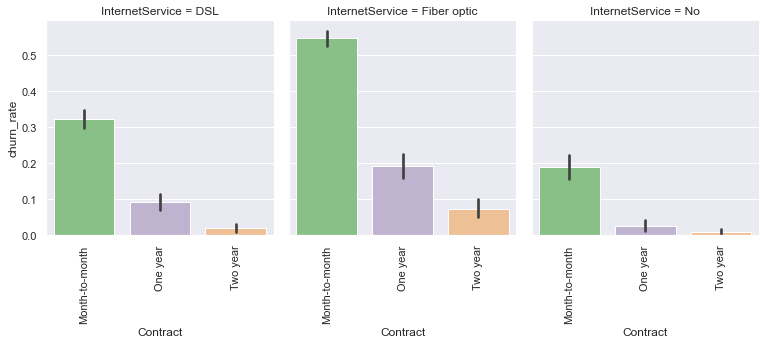

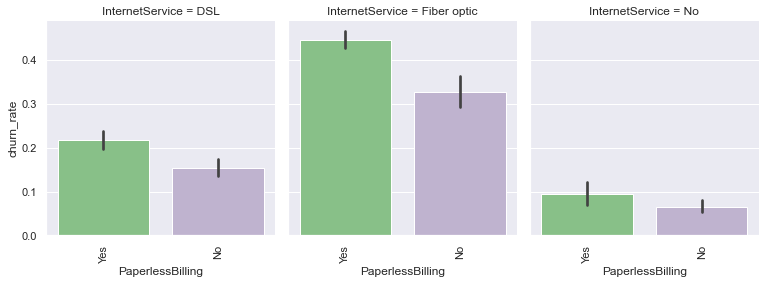

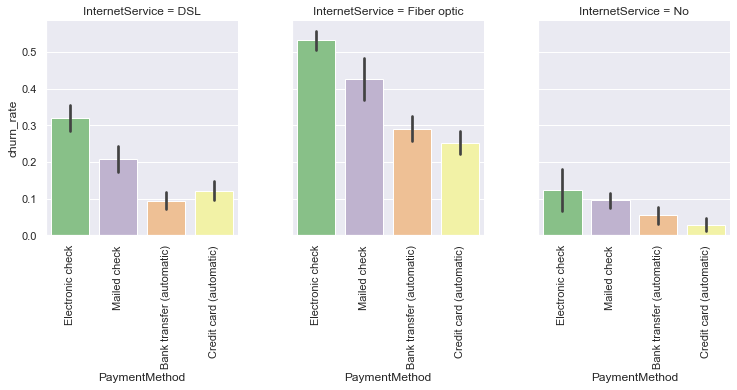

In [76]:
# Visualizing different factors effected wrt Internet Service
categories1=['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'gender','OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod']
x=0
for i in categories1:
    labels= list(df[f"{i}"].unique())
    g = sns.FacetGrid(df, col="InternetService", height=4, aspect=.9)
    y=f"ax_{x}" 
    y= g.map(sns.barplot, f"{i}", "churn_rate", palette = "Accent", order= df[f"{i}"].unique())
    y.set_xticklabels(labels=labels, rotation=90)
    x=x+1

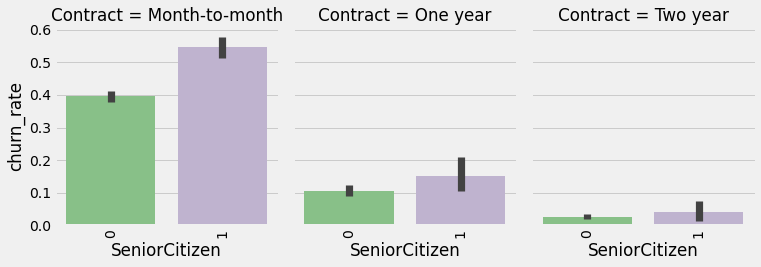

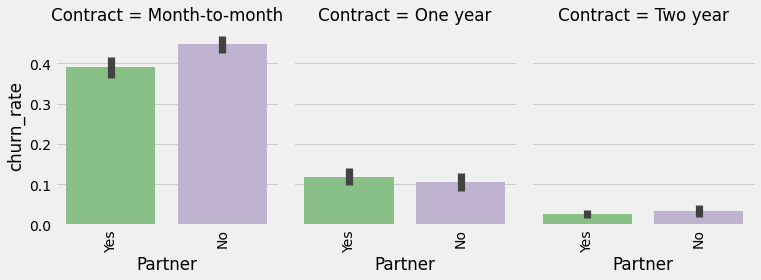

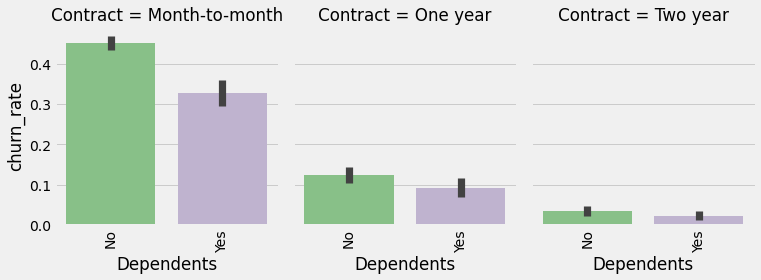

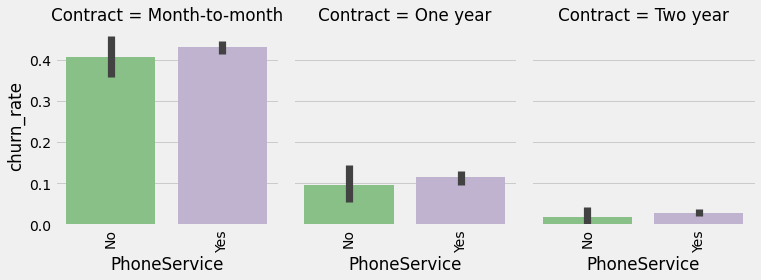

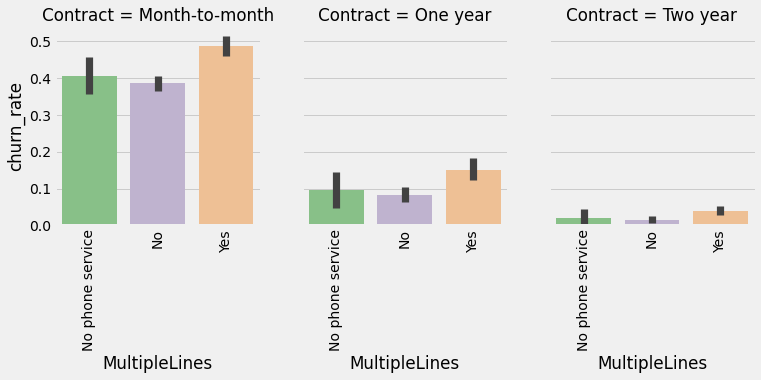

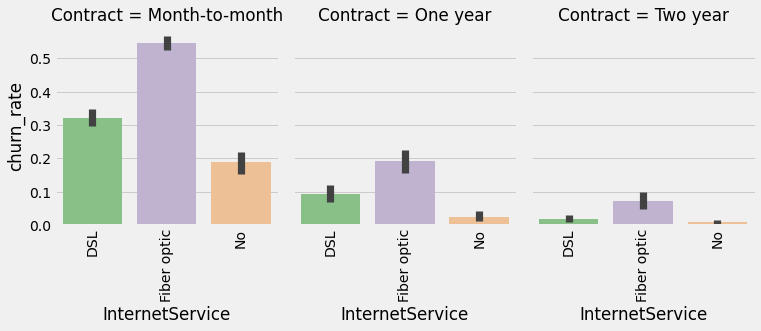

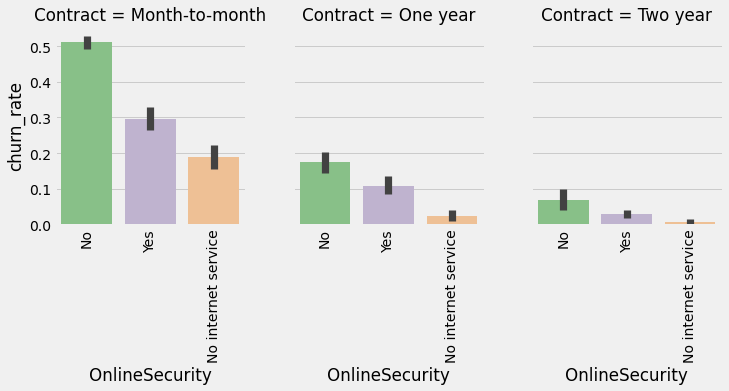

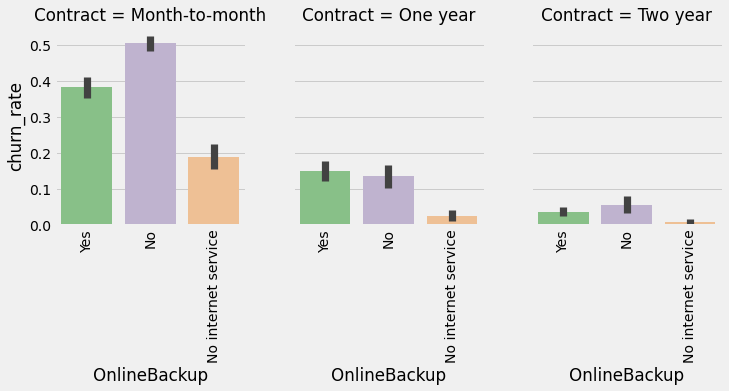

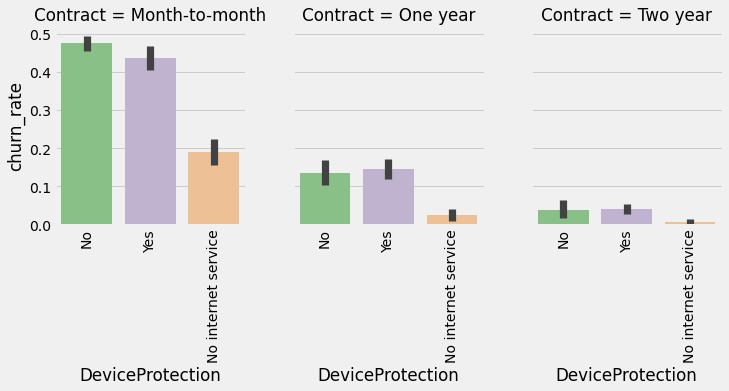

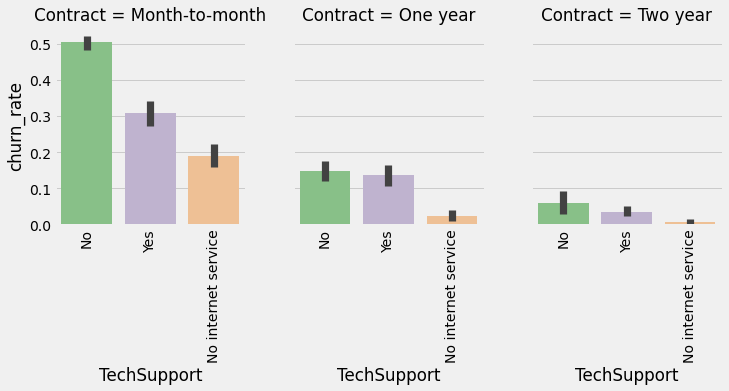

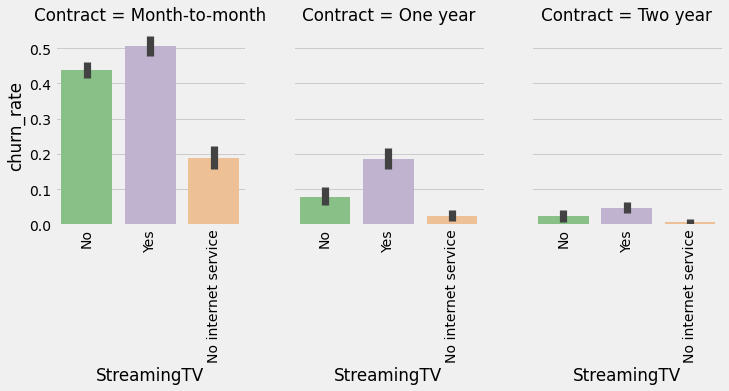

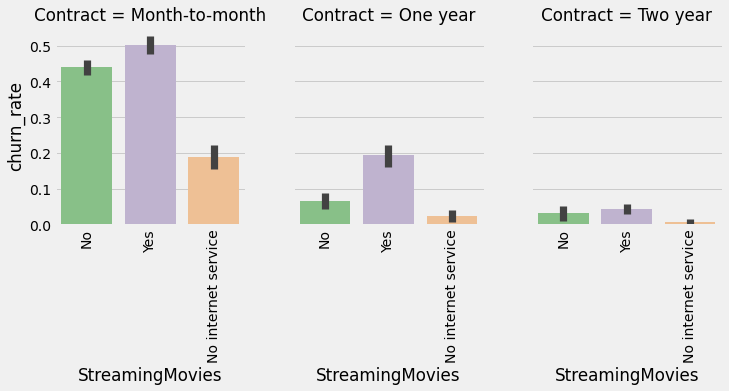

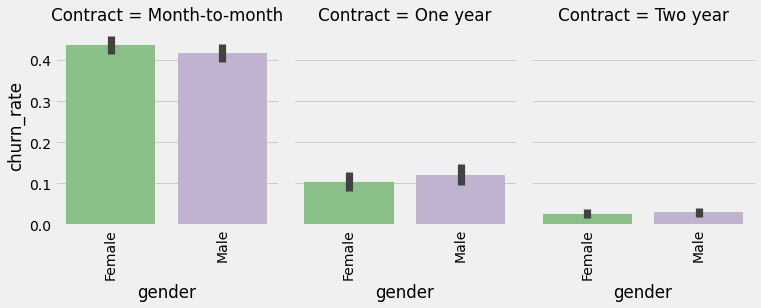

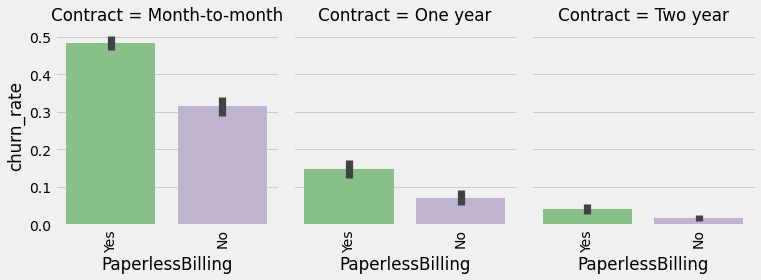

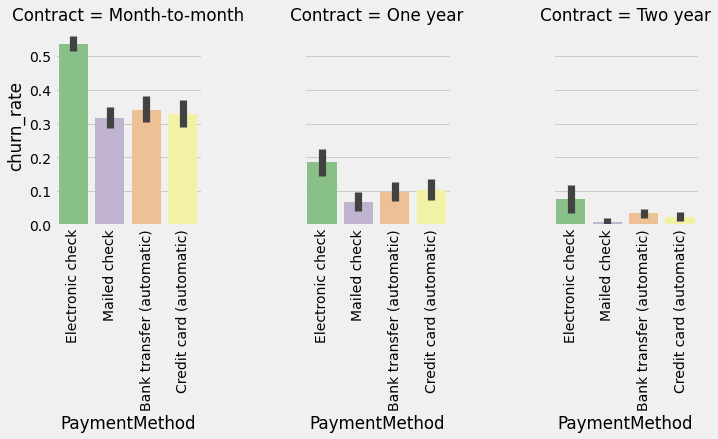

In [60]:
# Visualizing different factors wrt Contract
categories1=['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'gender',
       'PaperlessBilling', 'PaymentMethod']
x=0
for i in categories1:
    labels= list(df[f"{i}"].unique())
    g = sns.FacetGrid(df, col="Contract", height=4, aspect=.9)
    y=f"ax_{x}" 
    y= g.map(sns.barplot, f"{i}", "churn_rate", palette = "Accent", order= df[f"{i}"].unique())
    y.set_xticklabels(labels=labels, rotation=90)
    x=x+1

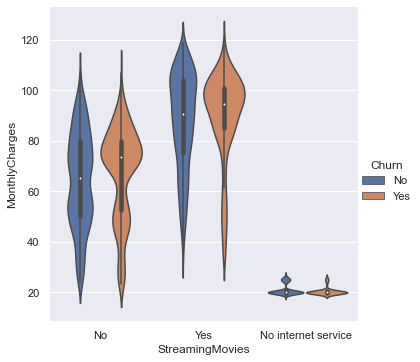

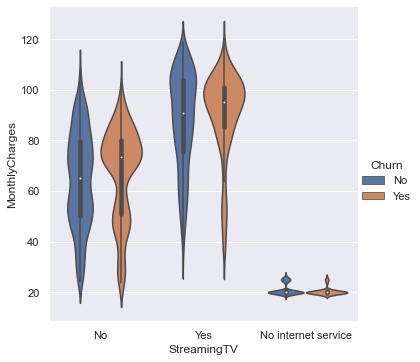

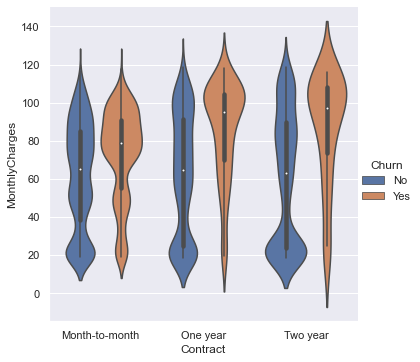

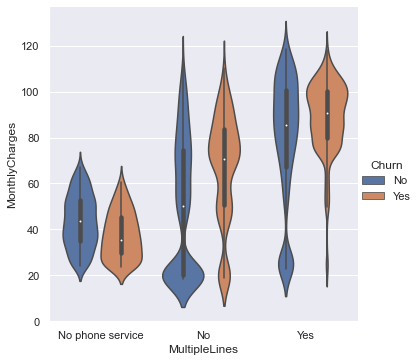

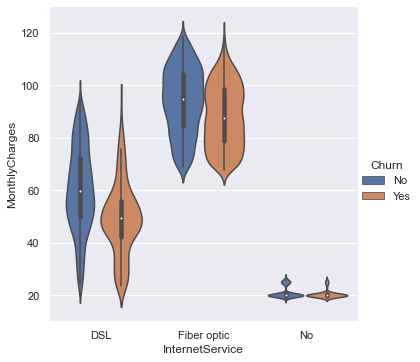

In [80]:
# Different parameters effecting monthly charges
sns.catplot(x="StreamingMovies", y="MonthlyCharges", hue="Churn", kind="violin", data=df)
sns.catplot(x="StreamingTV", y="MonthlyCharges", hue="Churn", kind="violin", data=df)
sns.catplot(x="Contract", y="MonthlyCharges", hue="Churn", kind="violin", data=df)
sns.catplot(x="MultipleLines", y="MonthlyCharges", hue="Churn", kind="violin", data=df)
sns.catplot(x="InternetService", y="MonthlyCharges", hue="Churn", kind="violin", data=df)

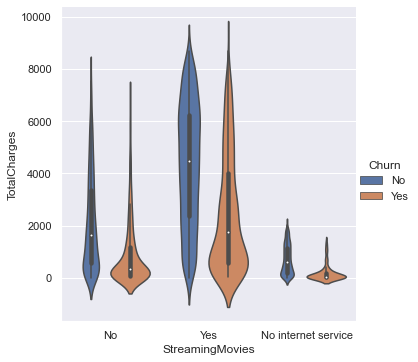

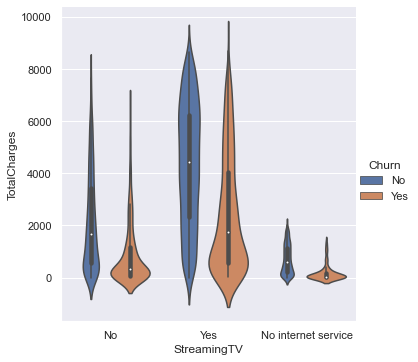

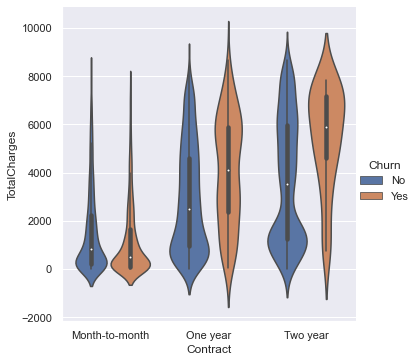

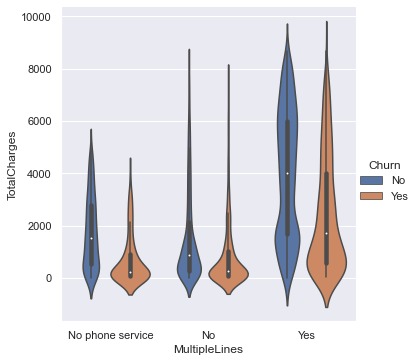

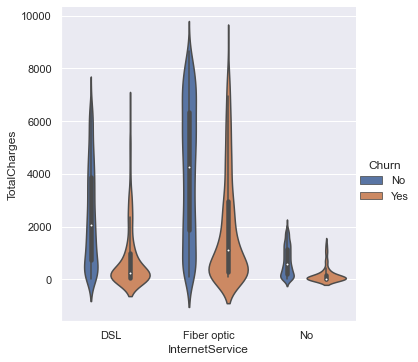

In [81]:
# Different parameters effecting Total charges
sns.catplot(x="StreamingMovies", y="TotalCharges", hue="Churn", kind="violin", data=df)
sns.catplot(x="StreamingTV", y="TotalCharges", hue="Churn", kind="violin", data=df)
sns.catplot(x="Contract", y="TotalCharges", hue="Churn", kind="violin", data=df)
sns.catplot(x="MultipleLines", y="TotalCharges", hue="Churn", kind="violin", data=df)
sns.catplot(x="InternetService", y="TotalCharges", hue="Churn", kind="violin", data=df)

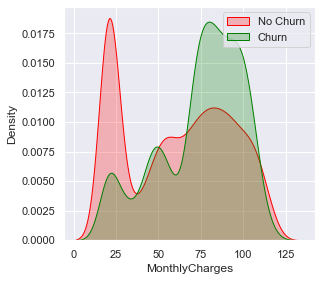

In [92]:
sns.set(rc={"figure.figsize": (4,4)})
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'No') ],
                color="Red", shade = True)
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="Green", shade= True)
ax.legend(["No Churn","Churn"],loc='upper right')


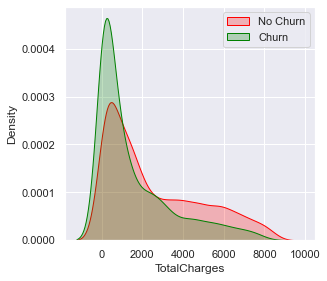

In [93]:
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'No') ],
                color="Red", shade = True)
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="Green", shade= True)
ax.legend(["No Churn","Churn"],loc='upper right')

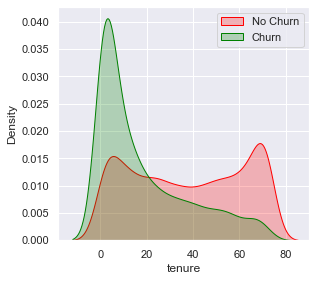

In [94]:
ax = sns.kdeplot(df.tenure[(df["Churn"] == 'No') ],
                color="Red", shade = True)
ax = sns.kdeplot(df.tenure[(df["Churn"] == 'Yes') ],
                ax =ax, color="Green", shade= True)
ax.legend(["No Churn","Churn"],loc='upper right')

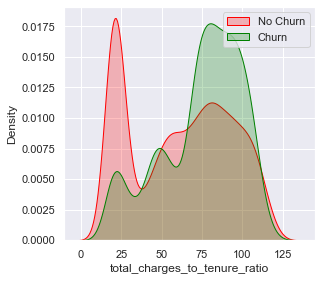

In [95]:
ax = sns.kdeplot(df.total_charges_to_tenure_ratio[(df["Churn"] == 'No') ],
                color="Red", shade = True)
ax = sns.kdeplot(df.total_charges_to_tenure_ratio[(df["Churn"] == 'Yes') ],
                ax =ax, color="Green", shade= True)
ax.legend(["No Churn","Churn"],loc='upper right')

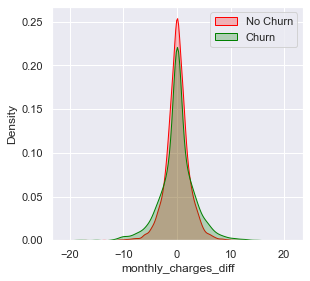

In [96]:
ax = sns.kdeplot(df.monthly_charges_diff[(df["Churn"] == 'No') ],
                color="Red", shade = True)
ax = sns.kdeplot(df.monthly_charges_diff[(df["Churn"] == 'Yes') ],
                ax =ax, color="Green", shade= True)
ax.legend(["No Churn","Churn"],loc='upper right')

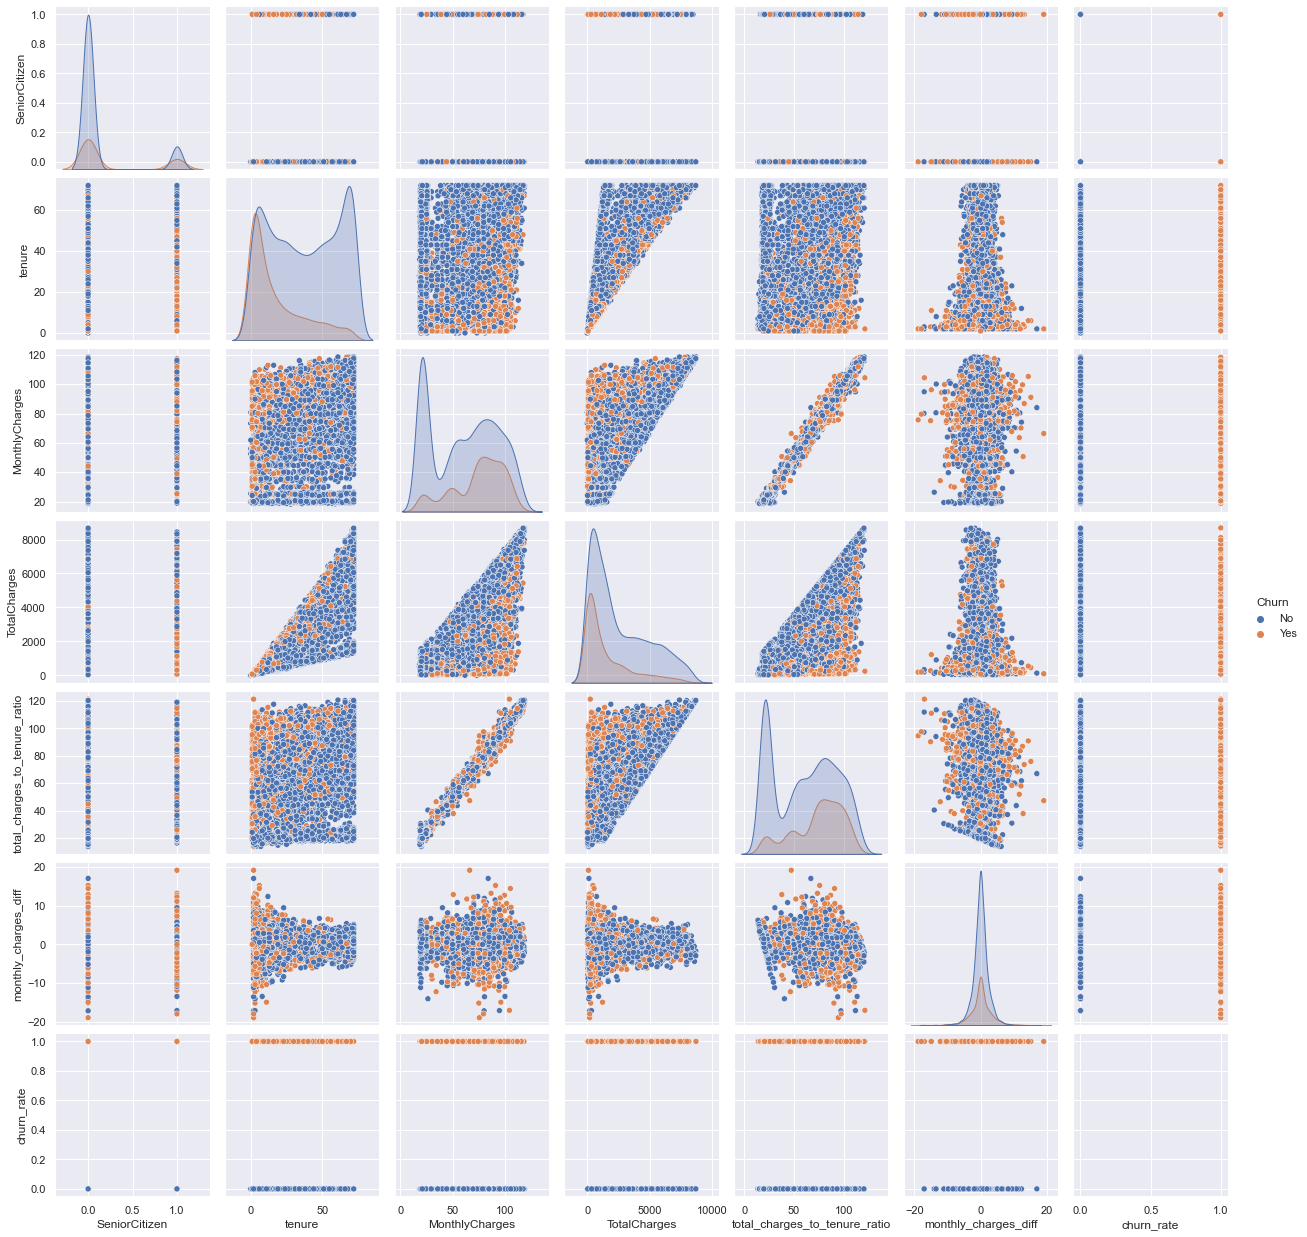

In [98]:
figsize=(20,10)
sns.pairplot(df,hue='Churn')

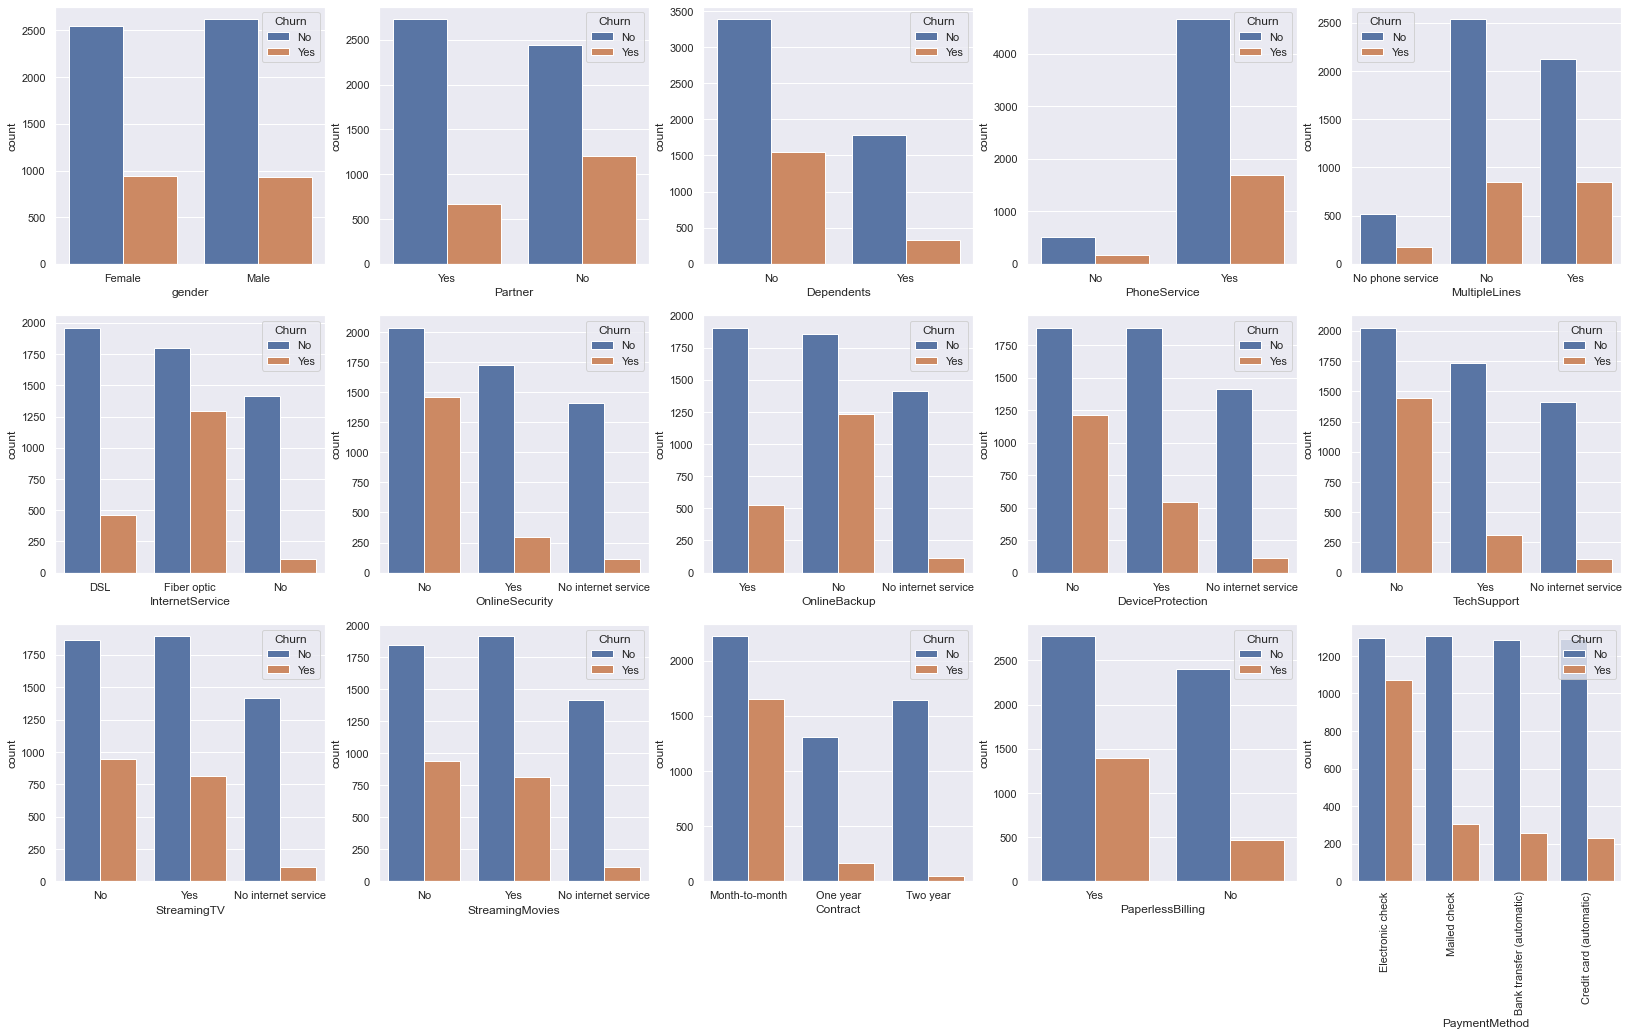

In [99]:
fig, axes = plt.subplots(nrows = 3,ncols = 5,figsize = (25,15))
sns.countplot(x = "gender", hue="Churn", data = df, ax=axes[0][0])
sns.countplot(x = "Partner",hue="Churn", data = df, ax=axes[0][1])
sns.countplot(x = "Dependents", hue="Churn",data = df, ax=axes[0][2])
sns.countplot(x = "PhoneService",hue="Churn", data = df, ax=axes[0][3])
sns.countplot(x = "MultipleLines",hue="Churn", data = df, ax=axes[0][4])
sns.countplot(x = "InternetService",hue="Churn", data = df, ax=axes[1][0])
sns.countplot(x = "OnlineSecurity", hue="Churn",data = df, ax=axes[1][1])
sns.countplot(x = "OnlineBackup",hue="Churn", data = df, ax=axes[1][2])
sns.countplot(x = "DeviceProtection",hue="Churn", data = df, ax=axes[1][3])
sns.countplot(x = "TechSupport", hue="Churn",data = df, ax=axes[1][4])
sns.countplot(x = "StreamingTV",hue="Churn", data = df, ax=axes[2][0])
sns.countplot(x = "StreamingMovies", hue="Churn",data = df, ax=axes[2][1])
sns.countplot(x = "Contract", hue="Churn",data = df, ax=axes[2][2])
sns.countplot(x = "PaperlessBilling",hue="Churn", data = df, ax=axes[2][3])
ax = sns.countplot(x = "PaymentMethod", hue="Churn",data = df, ax=axes[2][4])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show(fig)



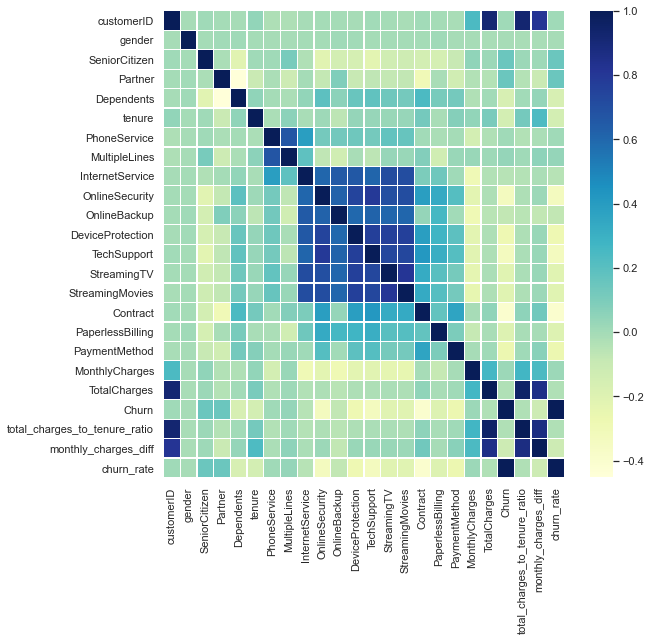

In [102]:
sns.set(rc={"figure.figsize": (8,8)})
corr = df.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
                 linewidths=.2, cmap="YlGnBu")

### Implement Machine Learning Models

In [105]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,total_charges_to_tenure_ratio,monthly_charges_diff,churn_rate
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,29.850000,0.000000,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,One year,No,Mailed check,56.95,1889.50,No,55.573529,1.376471,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,54.075000,-0.225000,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,40.905556,1.394444,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,75.825000,-5.125000,1


In [106]:
df1 = df.drop(columns=['customerID','total_charges_to_tenure_ratio','monthly_charges_diff', 'churn_rate'],axis=1)
from sklearn.preprocessing import LabelEncoder
def conversion(dataframe):
    if dataframe.dtype=='object':
        dataframe = LabelEncoder().fit_transform(dataframe)
    return dataframe
df1= df1.apply(lambda x: conversion(x))
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


<AxesSubplot:>

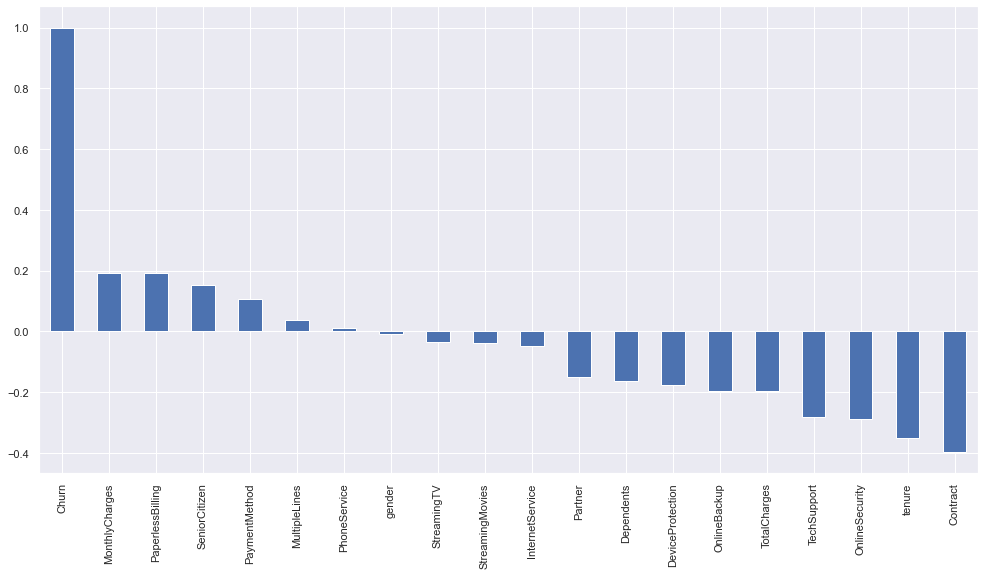

In [107]:
#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(15,8))
df1.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

In [108]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
from sklearn.metrics import classification_report,accuracy_score,mean_squared_error
from sklearn.model_selection import cross_val_score

In [109]:
y = df1['Churn']
X = df1.drop(columns = ['Churn'])
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 40)

#Setting up list of models to be used
models = [['LogisticRegression :', LogisticRegression()],
               ['SVM :', SVC()],
               ['KNeighbours :', KNeighborsClassifier()],
               ['DecisionTree :',DecisionTreeClassifier()],
               ['RandomForest :',RandomForestClassifier()], 
               ['Naive Bayes :', GaussianNB()],
               ['ExtraTreesClassifier :', ExtraTreesClassifier()],
               ['AdaBoostClassifier :', AdaBoostClassifier()],
               ['GradientBoostingClassifier: ', GradientBoostingClassifier()]]




### Model Evaluation

In [116]:
def regression_results(y_test, predictions):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_test, predictions)
    mean_absolute_error=metrics.mean_absolute_error(y_test, predictions) 
    mse=metrics.mean_squared_error(y_test, predictions) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_test, predictions)
    median_absolute_error=metrics.median_absolute_error(y_test, predictions)
    r2=metrics.r2_score(y_test, predictions)
    cv_score = cross_val_score(model, x_test, y_test, scoring='neg_mean_squared_error', cv=5)
    cv_score = np.abs(np.mean(cv_score))
    print('Regression Report')
    print('explained_variance: ', round(explained_variance,4))    
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))
    print('MAE: ', round(mean_absolute_error,4))
    print("CV Score:", cv_score)

In [117]:
for name,model in models:
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    print(name)
    regression_results(y_test, predictions)
    print()

LogisticRegression :
Regression Report
explained_variance:  -0.1006
mean_squared_log_error:  0.1035
r2:  -0.1055
MSE:  0.2153
RMSE:  0.464
MAE:  0.2153
CV Score: 0.2087179142437789

SVM :
Regression Report
explained_variance:  0.0
mean_squared_log_error:  0.1273
r2:  -0.3606
MSE:  0.265
RMSE:  0.5148
MAE:  0.265
CV Score: 0.2650263856677087

KNeighbours :
Regression Report
explained_variance:  -0.2058
mean_squared_log_error:  0.1141
r2:  -0.2197
MSE:  0.2376
RMSE:  0.4874
MAE:  0.2376
CV Score: 0.24703707438405428

DecisionTree :
Regression Report
explained_variance:  -0.4497
mean_squared_log_error:  0.1357
r2:  -0.4505
MSE:  0.2825
RMSE:  0.5315
MAE:  0.2825
CV Score: 0.2763671809350946

RandomForest :
Regression Report
explained_variance:  -0.1367
mean_squared_log_error:  0.1078
r2:  -0.1516
MSE:  0.2243
RMSE:  0.4736
MAE:  0.2243
CV Score: 0.2091806437878839

Naive Bayes :
Regression Report
explained_variance:  -0.2879
mean_squared_log_error:  0.1264
r2:  -0.3509
MSE:  0.2631
RMSE: 

In [118]:
for name,model in models:
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    print(name, accuracy_score(y_test, predictions)*100)

LogisticRegression : 78.46663511594889
SVM : 73.49739706578325
KNeighbours : 76.24230951254141
DecisionTree : 71.32039753904401
RandomForest : 76.95220066256508
Naive Bayes : 73.68670137245623
ExtraTreesClassifier : 76.57359204921912
AdaBoostClassifier : 78.93989588263133
GradientBoostingClassifier:  78.84524372929485


### Final Conclusions

In [263]:
#From the above stats we conclude that the Adaboost Classifier is the model that best classifies the dataset